# Figure to show contour error
We want to put this part in the appendix. 

In [1]:
import os 
import sys 

print(os.getcwd()) # print the current working directory
sys.path.append(os.path.join(os.getcwd(), '..','..')) # add the root directory to the path
os.chdir("../..")
print(os.getcwd())
from src.plots.plotter import *
import matplotlib.pyplot as plt 
import numpy as np

/home/jovyan/project/MirrorDescent-DFT/figures/fig_contour_error
/home/jovyan/project/MirrorDescent-DFT


/home/jovyan/project/envs/jax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [22]:
# Load data 
import pickle
data_dir = "./figures/fig_contour_error" 
data = pickle.load(open(os.path.join(data_dir, "data.pkl"), "rb"))
errors = data["errors"]
betas = data["betas"]
poles = data["poles"]


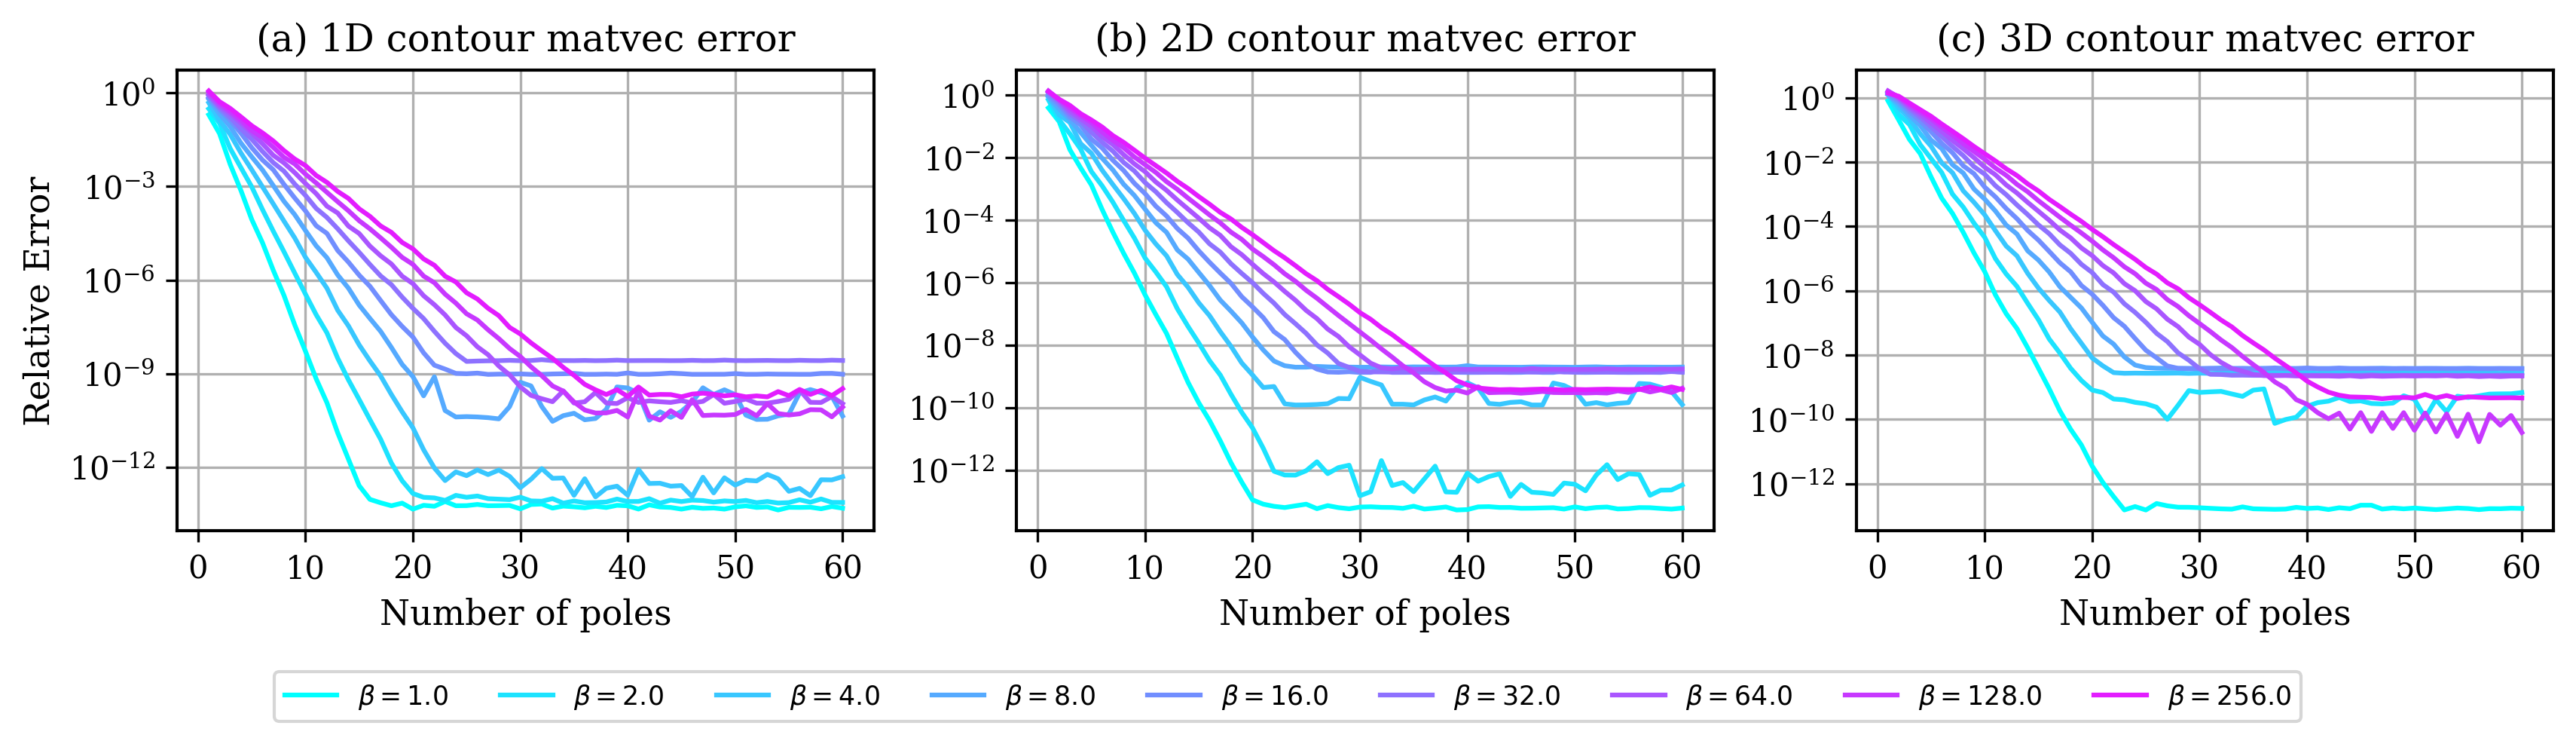

In [30]:
# Plot the error 
plt.figure(figsize=(11.5, 3), dpi=300) 
for dim in range(3):
    plt.subplot(1,3,dim+1)
    for i in range(len(betas)):
        plt.plot(poles, errors[dim,i,:], 
                 label=f'$\\beta = {betas[i]}$', 
                 color=plt.cm.cool(i/len(betas))) 
    plt.yscale('log')
    plt.xlabel('Number of poles')
    if dim == 0:
        plt.ylabel('Relative Error')
    # if dim == 2:
    #     plt.legend()
    # plt.legend()
    # Remove individual legends from subplots
    if dim == 2:
        # Create a shared legend for the entire figure
        handles, labels = plt.gca().get_legend_handles_labels()
        plt.gcf().legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), 
                         ncol=len(betas), frameon=True, fontsize='small')
    plt.grid(True)
    plt.title(f'({chr(97+dim)}) {dim+1}D contour matvec error') 

plt.tight_layout()
# Adjust the bottom margin to make room for the legend
plt.subplots_adjust(bottom=0.2)

# Save figures with the adjusted layout
plt.savefig(os.path.join(data_dir, "fig_contour_error.png"), bbox_inches='tight')
plt.savefig(os.path.join(data_dir, "fig_contour_error.pdf"), format='pdf', bbox_inches='tight')